<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/CHAT_REDUCCION_MDS%26T_SNE%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_name = "_chatAre.txt"

text = open("_chatAre.txt", encoding="utf8").read()

In [ ]:
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist
from PIL import Image
import re
import stylecloud
import nltk
import unicodedata

In [ ]:
#Separamos los mensajes
text=text.split('[')
text=text[1:]

In [ ]:
#Número de mensajes
len(text)

4914

In [ ]:
#Visualizamos la información
text

['13/01/21 16:08:25] Arely: \u200eLos mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos.\n',
 '13/01/21 16:08:25] Fernando👊🏼: Oye\n\u200e',
 '13/01/21 16:10:25] Arely: \u200esticker omitido\n\u200e',
 '13/01/21 16:10:47] Fernando👊🏼: RSV342388775 \u200edocumento omitido\n',
 '13/01/21 16:11:07] Arely: Jiji\n\u200e',
 '13/01/21 16:11:11] Arely: \u200esticker omitido\n',
 '13/01/21 16:11:15] Fernando👊🏼: Poki\n',
 '13/01/21 16:11:20] Fernando👊🏼: Ya viste el resultado?\n',
 '13/01/21 16:22:44] Arely: Ya poki\n',
 '13/01/21 16:22:46] Arely: Que buena onda\n',
 '13/01/21 16:33:11] Fernando👊🏼: ????\n',
 '13/01/21 16:33:20] Arely: Pues que saliste negativo\n',
 '13/01/21 16:33:21] Arely: Tonto\n',
 '13/01/21 16:33:23] Fernando👊🏼: No\n\u200e',
 '13/01/21 16:33:23] Arely: \u200esticker omitido\n',
 '13/01/21 16:33:26] Fernando👊🏼: Salí positivo\n',
 '13/01/21 16:33:29] Arely: No\n',
 '13/01/21 16:33:32] Arely: 

In [ ]:
#Guardamos en lista vacía los valores e iniciamos en 1 dado que el primer valor no tiene sentido
fechas=[]
commen=[]
for i in range(1,len(text)):
    fechas.append(text[i].split("]")[0])
    commen.append(text[i].split("]")[1])

In [ ]:
fecha=[fechas[i].split(' ')[0] for i in range(0,len(fechas))]
hora=[fechas[i].split(' ')[1] for i in range(0,len(fechas))]

In [ ]:
Autor=[commen[i].split(':')[0].strip() for i in range(0,len(commen))]
comentario=[commen[i].split(':')[1].strip() for i in range(0,len(commen))]

In [ ]:
data=pd.DataFrame()
data['Fecha']=fecha
data['Hora']=hora
data['Autor']=Autor
data['Comentario']=comentario
data.Fecha=pd.to_datetime(data.Fecha, dayfirst = True)

In [ ]:
data.head()

Fecha      Hora       Autor                       Comentario
0 2021-01-13  16:08:25  Fernando👊🏼                           Oye\n‎
1 2021-01-13  16:10:25       Arely              ‎sticker omitido\n‎
2 2021-01-13  16:10:47  Fernando👊🏼  RSV342388775 ‎documento omitido
3 2021-01-13  16:11:07       Arely                          Jiji\n‎
4 2021-01-13  16:11:11       Arely                 ‎sticker omitido

# Análisis exploratorio

In [ ]:
data.isna().mean()

Fecha         0.0
Hora          0.0
Autor         0.0
Comentario    0.0
dtype: float64

In [ ]:
import string 
#Primero vamos a limpiar el texto
#Quitamos acentos y puntuaciones
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8' , 'ignore')
    return text

#Removemos signos de puntuación
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)

## quita caracteres especiales
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern,' ', text)
    return text

In [ ]:
aux=[]
for i in range(0,len(data['Autor'])):
    #Limpiamos texto
    x = remove_special_characters(remove_accented_chars(data['Autor'][i].translate(remove_punct_dict).lower()))
    aux.append(x)

data['Autor']=aux

In [ ]:
#Quitamos acentos y caracteres especiales
aux=[]
for i in range(0,len(data['Comentario'])):
    #Limpiamos texto
    x = remove_special_characters(remove_accented_chars(data['Comentario'][i].translate(remove_punct_dict).lower()))
    aux.append(x)
data['Comentario'] = aux

In [ ]:
#Quitamos stop words
aux1=[]
for i in range(0,len(aux)):
    userstring =aux[i].split(" ")
    another_list = []
    for x in userstring:
         if x not in stopwords.words('spanish'):           # Compara la lista y remueve
                another_list.append(x) 
                m = " ".join(another_list)
    aux1.append(m)
    
aux1=[aux1[i].split('\n')[0] for i in range(0,len(aux1))]
aux1=[' '.join(aux1[i].split()) for i in range(0,len(aux1))]
data['Comentario'] = aux1

In [ ]:
#Identificamos multimedia omitida
data['Comentario']= data['Comentario'].replace({' xe x  x eimagen omitidarnxe x  x': 'imagen omitida'})
data['Comentario']= data['Comentario'].replace({' xe x  x eaudio omitidorn': 'audio omitido'})
#Re signamos las etiquetas como total multimedia
data['Comentario']= data['Comentario'].replace({'imagen omitida': 'total multimedia'})
data['Comentario']= data['Comentario'].replace({'audio omitido': 'total multimedia'})
data['Comentario']= data['Comentario'].replace({'sticker omitido': 'total multimedia'})
data['Comentario']= data['Comentario'].replace({'documento omitido': 'total multimedia'})

In [ ]:
#Tenemos 33 casos de total multimedia
len(data[data['Comentario']=='total multimedia'])

844

In [ ]:
#Eliminamos esos casos
data.drop(data.loc[data['Comentario']=='total multimedia'].index, inplace=True)

In [ ]:
#Visualizamos las nuevas dimensiones
data.shape

(4069, 4)

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.head(3)

Fecha      Hora     Autor             Comentario
0 2021-01-13  16:08:25  fernando                    oye
1 2021-01-13  16:10:47  fernando  rsv documento omitido
2 2021-01-13  16:11:07     arely                   jiji

In [ ]:
data['Comentario']=data['Comentario'].replace({'':np.nan})

In [ ]:
data.isna().mean()

Fecha         0.000000
Hora          0.000000
Autor         0.000000
Comentario    0.042025
dtype: float64

In [ ]:
data = data[data['Comentario'].notna()]
data = data.reset_index(drop=True)

In [ ]:
data.isna().mean()

Fecha         0.0
Hora          0.0
Autor         0.0
Comentario    0.0
dtype: float64

In [ ]:
corpus=data['Comentario'].to_list()

In [ ]:
freq=nltk.FreqDist(corpus)

In [ ]:
freq.hapaxes()[0:3]

['rsv documento omitido', 'viste resultado', 'buena onda']

In [ ]:
text_clean=' '.join(list(set(corpus).difference(freq.hapaxes())))

In [ ]:
aux=[]
for i in range(0,len(data)):
    another_list=[]
    x=data['Comentario'][i].split()
    for j in range(0,len(x)):
        if x[j] in text_clean.split():           # Compara la lista y remueve
            another_list.append(x[j])
    aux.append(" ".join(another_list))

In [ ]:
data['preprocesado']=aux
data['Comentario']=data['Comentario'].replace({'':np.nan})
data = data[data['Comentario'].notna()]
data = data.reset_index(drop=True)

In [ ]:
data.shape

(3898, 5)

In [ ]:
data['preprocesado']= data['preprocesado'].replace({'video omitido': 'total multimedia'})
data['preprocesado']= data['preprocesado'].replace({'documento omitido': 'total multimedia'})
#Tenemos 33 casos de total multimedia
len(data[data['preprocesado']=='total multimedia'])


14

In [ ]:
#Eliminamos esos casos
data.drop(data.loc[data['preprocesado']=='total multimedia'].index, inplace=True)
data = data.reset_index(drop=True)

In [ ]:
data['preprocesado']=[data['preprocesado'][i].strip() for i in range(0,len(data['preprocesado']))]
data['preprocesado']=data['preprocesado'].replace({'':np.nan})

In [ ]:
data = data[data['preprocesado'].notna()]
data = data.reset_index(drop=True)

In [ ]:
data.shape

(2918, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv = TfidfVectorizer(ngram_range=(1, 2), min_df=15, max_features=30)

In [ ]:
cv.fit(data["preprocesado"])

TfidfVectorizer(max_features=30, min_df=15, ngram_range=(1, 2))

In [ ]:
pd.DataFrame(data = cv.transform(data["preprocesado"]).todense(), columns = cv.get_feature_names()).shape

(2918, 30)

In [ ]:
tabla=pd.DataFrame(data = cv.transform(data["preprocesado"]).todense(), columns = cv.get_feature_names())

In [ ]:
tabla.head()

amor  aqui  asi  bebe  bien  bueno  dias  fernando  jaja  jajaja  ...  \
0   0.0   0.0  0.0   0.0   0.0    0.0   0.0       0.0   0.0     0.0  ...   
1   0.0   0.0  0.0   0.0   0.0    0.0   0.0       0.0   0.0     0.0  ...   
2   0.0   0.0  0.0   0.0   0.0    0.0   0.0       0.0   0.0     0.0  ...   
3   0.0   0.0  0.0   0.0   0.0    0.0   0.0       0.0   0.0     0.0  ...   
4   0.0   0.0  0.0   0.0   0.0    0.0   0.0       0.0   0.0     0.0  ...   

   poki  pues  quieres  quiero   si  solo  tambien  vale  vas  voy  
0   0.0   0.0      0.0     0.0  0.0   0.0      0.0   0.0  0.0  0.0  
1   0.0   0.0      0.0     0.0  0.0   0.0      0.0   0.0  0.0  0.0  
2   1.0   0.0      0.0     0.0  0.0   0.0      0.0   0.0  0.0  0.0  
3   1.0   0.0      0.0     0.0  0.0   0.0      0.0   0.0  0.0  0.0  
4   0.0   0.0      0.0     0.0  0.0   0.0      0.0   0.0  0.0  0.0  

[5 rows x 30 columns]

# Solución Análitica

In [ ]:
import cufflinks as cf
cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import plotly.express as px
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot

In [ ]:
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')

### $\bullet$ PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(tabla), columns=["p1", "p2"], index=tabla.index)
Xp["label"] = data["Autor"].astype(str)

In [ ]:
Xp.head()

p1        p2     label
0 -0.054166 -0.094733  fernando
1 -0.054166 -0.094733     arely
2  0.889893  0.206172  fernando
3  0.889893  0.206172     arely
4 -0.054166 -0.094733     arely

In [ ]:
Xp.iplot(kind="scatter", mode="markers", x="p1", y="p2", categories="label", title=f"PCA")

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
pca = PCA(n_components=3)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(tabla), columns=["p1", "p2", "p3"],index=tabla.index)
Xp["label"] = data["Autor"].astype(str)

In [ ]:
pca.explained_variance_ratio_.sum()

0.3309389760558643

In [ ]:
Xp

p1        p2        p3     label
0    -0.054176 -0.094712 -0.046442  fernando
1    -0.054176 -0.094712 -0.046442     arely
2     0.889893  0.206174  0.022114  fernando
3     0.889893  0.206174  0.022114     arely
4    -0.054176 -0.094712 -0.046442     arely
...        ...       ...       ...       ...
2913 -0.062035 -0.112038 -0.038620     arely
2914 -0.102860 -0.072482 -0.119942  fernando
2915 -0.068508 -0.114343 -0.082881     arely
2916 -0.054176 -0.094712 -0.046442  fernando
2917 -0.054176 -0.094712 -0.046442     arely

[2918 rows x 4 columns]

In [ ]:
Xp.iplot(kind="scatter3d", mode="markers", x="p1", y="p2",z='p3', categories="label", title=f"PCA")

# MDS

In [ ]:
mds = MDS(n_components=2, n_jobs=-1)

In [ ]:
Xm = pd.DataFrame(data=mds.fit_transform(tabla[[x for x in tabla.columns]]), columns = ["d1", "d2"])

In [ ]:
Xm["label"] = data["Autor"].reset_index(drop = True).astype(str)

In [ ]:
Xm.iplot(kind="scatter", mode="markers", x="d1", y="d2", categories="label", title=f"MDS")

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
mds = MDS(n_components=3, n_jobs=-1)

In [ ]:
Xm = pd.DataFrame(data=mds.fit_transform(tabla[[x for x in tabla.columns ]]), columns = ["d1", "d2", "d3"])

In [ ]:
Xm["label"] = data["Autor"].reset_index(drop = True).astype(str)

In [ ]:
Xm.iplot(kind="scatter3d", mode="markers", x="d1", y="d2", z="d3", categories="label", title=f"MDS")

# T-SNE

In [ ]:
for per in [0,10,20, 30, 40,50,100,200]:
    tsne = TSNE(random_state=777, perplexity=per)
    Xt = pd.DataFrame(data=tsne.fit_transform(tabla), columns=["d1", "d2"])
    Xt["label"] = data["Autor"].reset_index(drop = True).astype(str)
    Xt.iplot(x="d1", y="d2", kind="scatter", mode='markers', categories="label", title=f"t-SNE (perpleity: {per})")

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



# PREGUNTAS Y RESPUESTAS

# 1.- ¿Cuál visualización considera más correcta y por qué?

# R = La visualización T-SNE con perplejidad de 10 es la que muestra una agrupación de elementos más clara, considera menos vecinos cercanos para mostrar ese comportamiento. Aunque hay elementos dispersos, podemos notar un grupo

In [ ]:
tsne = TSNE(random_state=777, perplexity=10)
Xt = pd.DataFrame(data=tsne.fit_transform(tabla), columns=["d1", "d2"])
Xt["label"] = data["Autor"].reset_index(drop = True).astype(str)
Xt.iplot(x="d1", y="d2", kind="scatter", mode='markers', categories="label", title=f"t-SNE (perpleity: {10})")

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/euler/.local/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



# 2.- ¿Alguna visualización muestra algún patrón de agrupamiento?

# R = Las visualizaciones T-SNE con perplejidad de 0,10,20,30,40,50 y 100 muestran patrones de agrupamiento.

# 3.- ¿A qué cree que se deba este comportamiento?

# R = A que la el algoritmo T-SNE al no ser un algoritmo lineal encuentra mejores agrupaciones que los algoritmos lineales, además de poder dar mejores resulltados en función de los vecinos considerados

# 4.-Sin la ayuda de ningún algoritmo de agrupamiento: ¿Podría nombrar a algún grupo encontrado en función de los mensajes que lo forman?

# R = A tráves de las coordenadas mostradas en el gráfico de reducción de la dimensionalidad podemos tomar los cuadrantes en donde se encuentra las agrupaciones, analizar sus palabras más frecuentes para darle un nombre a la agrupación en este caso tuvimos 2 agrupaciones en donde dado sus palabras frecuentes al primero se le dio el nombre de "Enojo" y al otro de "Felicidad"

In [ ]:
df=pd.concat([data,Xt[['d1','d2']]],axis=1)

In [ ]:
G1=df[(df['d1'].between(-37.5,-6.5)) & (df['d2'].between(-17.8,11.47))]

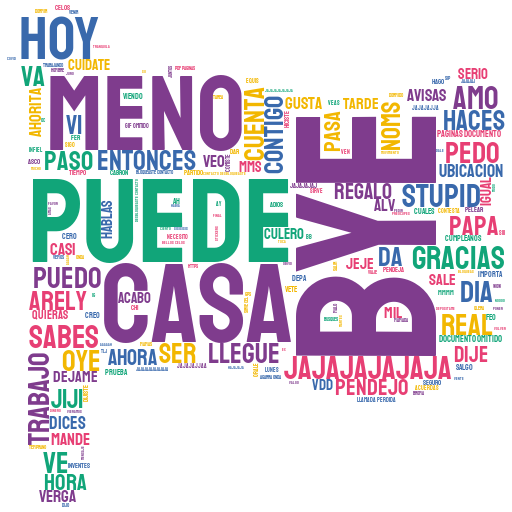

In [ ]:
G1=G1.reset_index()
            
aux0=' '.join(G1['preprocesado'].tolist())
with open("/home/euler/Fer Villa/texto_wordcloud.txt","w") as f:
        f.write(aux0)
path_texto="/home/euler/Fer Villa/texto_wordcloud.txt"
path_imagen="/home/euler/Fer Villa/texto_wordcloud.png"
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)
Image.open(path_imagen)


In [ ]:
from nltk.probability import FreqDist
fdist=FreqDist(G1['preprocesado'].tolist())
df1=pd.DataFrame(fdist.items(), columns=['Palabra', 'Frecuencia'])
df1=df1.sort_values('Frecuencia',ascending=False).reset_index(drop=True)
df1.head(10)

Palabra  Frecuencia
0           bye          21
1  jajajajajaja          16
2           amo          15
3           oye          14
4        stupid          14
5       gracias          14
6         sabes          13
7          casa          12
8           hoy          12
9       pendejo          11

In [ ]:
G2=df[~(df['d1'].between(-37.5,-6.5)) & (df['d2'].between(-17.8,11.47))]

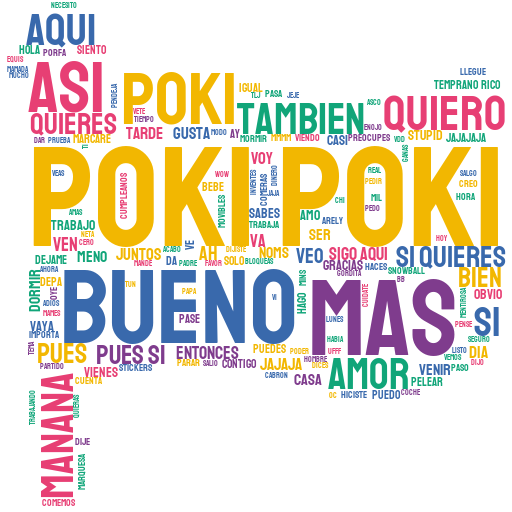

In [ ]:
G2=G2.reset_index()
            
aux0=' '.join(G2['preprocesado'].tolist())
with open("/home/euler/Fer Villa/texto_wordcloud.txt","w") as f:
        f.write(aux0)
path_texto="/home/euler/Fer Villa/texto_wordcloud.txt"
path_imagen="/home/euler/Fer Villa/texto_wordcloud.png"
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)
Image.open(path_imagen)


In [ ]:
from nltk.probability import FreqDist
fdist=FreqDist(G2['preprocesado'].tolist())
df=pd.DataFrame(fdist.items(), columns=['Palabra', 'Frecuencia'])
df=df.sort_values('Frecuencia',ascending=False).reset_index(drop=True)
df.head(10)

Palabra  Frecuencia
0        poki         156
1         asi          21
2       bueno          18
3      quiero          14
4         mas          13
5        aqui          12
6  bueno amor           9
7     tambien           8
8    mas bien           7
9     quieres           7